In [ ]:
# 구글 드라이브 Mount
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
data_dir = '/content/drive/MyDrive/AKI/mimic/3.0'

In [ ]:
hosp_dir = f"{data_dir}/hosp"
icu_dir = f"{data_dir}/icu"

# 1. 데이터 수집 및 변수 정의

전체 데이터는 각 병원의 전자의무기록(EHR)에서 수집되었습니다. 수집된 데이터는 인구통계학적 정보, 실험실 검사 결과, 바이탈 사인, 임상 상태 등을 포함합니다. AKI 발생과 관련된 위험 요인으로 알려진 변수를 선택하였으며, 관련 문헌에서 AKI 발생과의 상관관계가 있는 변수들을 모델 개발에 사용했습니다.

총 107개의 변수가 모델에 포함되었습니다. 각 변수는 정적 변수(Static Variables)와 동적 변수(Dynamic Variables)로 분류되었습니다.

정적 변수 (Static Variables)
입원 기간 동안 변하지 않는 시간 불변의 값들로 정의되었습니다.

1. **인구통계학적 정보(Demographics)**: 성별, 나이, 인종, BMI(체질량지수) 등이 포함됩니다.
2. **병력 및 동반질환(Comorbidities)**: ICD-10 진단 코드를 기준으로 Charlson Comorbidity Index에 따라 17개의 카테고리로 분류되었습니다.
   - 예시: 심부전, 당뇨병, 만성 신장 질환 등.
3. **BMI 계산**: 입원 시 측정된 신장과 체중을 기반으로 BMI를 계산했습니다.
4. **입원 전 투약 이력 (Medication History Before Admission)**: 입원 전 사용한 약물 이력은 정적 변수로 처리되었습니다.


동적 변수 (Dynamic Variables)
입원 기간 동안 일일 단위로 업데이트되는 값들로 정의되었습니다.

1. **실험실 검사 결과 (Laboratory Tests)**:
   - 크레아티닌(Creatinine, Cr), 백혈구(White Blood Cells), 헤모글로빈(Hemoglobin), 혈소판(Platelets), 알부민(Albumin), 나트륨(Sodium), 칼륨(Potassium), 염화물(Chloride), 아스파테이트 아미노전달효소(Aspartate Aminotransferase, AST), 알라닌 아미노전달효소(Alanine Aminotransferase, ALT), 혈중 요소 질소(Blood Urea Nitrogen, BUN), 총 CO₂(Total CO2), 빌리루빈(Bilirubin), 칼슘(Calcium), 포도당(Glucose), 크레아틴 키나아제(Creatine Kinase, CK), 리파아제(Lipase), 트로포닌 I(Troponin I).
   - **실험실 검사 값 처리**: 하루에 여러 번 측정된 경우 평균값을 사용하여 모델에 입력했습니다.

2. **바이탈 사인 (Vital Signs)**:
   - 수축기 혈압(Systolic Blood Pressure), 이완기 혈압(Diastolic Blood Pressure), 평균 동맥압(Mean Arterial Pressure), 맥박(Pulse), 체온(Body Temperature).
   - 일반 병동에서는 하루에 보통 3번 측정되므로, 하루 동안의 평균, 최대, 최소값을 각각 다른 변수로 사용했습니다.

3. **임상 상태 (Clinical Conditions)**:
   - 중환자실 체류 기간 동안 발생한 임상 상태와 관련된 변수들로, 예를 들어 신장 기능 저하, 수액량, 소변량 등이 포함됩니다.

4. **입원 중 약물 사용 내역 (Medications During Admission)**:
   - 입원 중 사용된 약물은 동적 범주형 변수로 모델에 포함되었으며, 잘 알려진 신독성 약물들도 포함되었습니다.
   - 예시: 비스테로이드성 항염증제(NSAIDs), 아미노글리코사이드(Aminoglycoside), 반코마이신(Vancomycin), 콜리스틴(Colistin) 등.

변수 처리 (Variable Handling)

각 변수는 AKI 발생 여부와의 상관관계를 확인하기 위해 분류 및 가공되었습니다. 예를 들어, 신독성 약물의 사용 여부는 이진 변수로 처리되었으며, 실험실 검사 값은 일일 평균으로 정규화되었습니다.


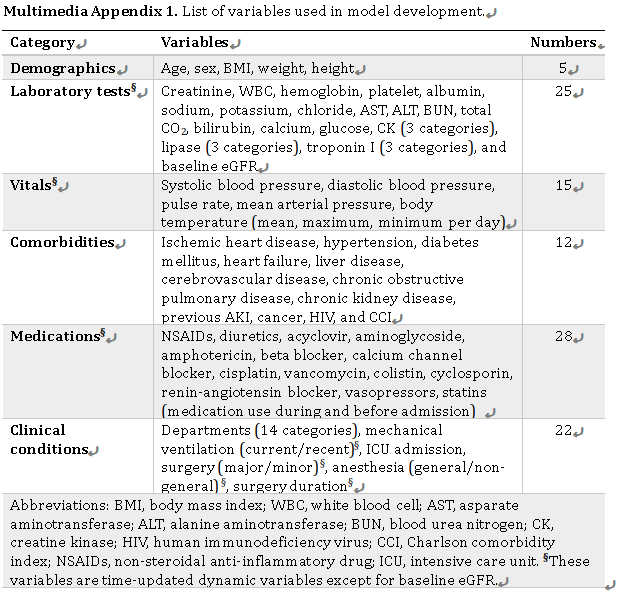

필요한 피쳐
- patients: age, sex,

1. Demographics (인구통계학적 정보)
- **변수 목록**: Age(나이), Sex(성별), BMI(체질량지수), Weight(체중), Height(신장)
- **변수 수**: 5개
- **설명**:
  - 입원 시 환자의 인구통계학적 특성을 나타내는 변수들입니다.
  - 이러한 변수들은 환자의 기초 건강 상태를 나타내며, AKI 발생 위험 평가에 사용됩니다.



---



2. Laboratory Tests (실험실 검사)
- **변수 목록**:
  - Creatinine(크레아티닌), WBC(백혈구), Hemoglobin(헤모글로빈), Platelet(혈소판), Albumin(알부민), Sodium(나트륨), Potassium(칼륨), Chloride(염화물), AST(아스파테이트 아미노전달효소), ALT(알라닌 아미노전달효소), BUN(혈중 요소 질소), Total CO₂(총 CO₂), Bilirubin(빌리루빈), Calcium(칼슘), Glucose(포도당), CK(크레아틴 키나아제, 3개의 하위 분류), Lipase(리파아제, 3개의 하위 분류), Troponin I(트로포닌 I, 3개의 하위 분류), Baseline eGFR(기준 사구체 여과율).
- **변수 수**: 25개
- **설명**:
  - 실험실 검사 결과를 나타내는 동적 변수들입니다. 입원 기간 동안 측정된 값이 모델에 사용됩니다.
  - AKI 발생 여부를 예측하기 위해 신장 기능을 나타내는 지표(예: 크레아티닌, BUN)와 기타 생리적 상태를 평가할 수 있는 검사 항목들이 포함되어 있습니다.
  - 대부분의 변수는 입원 기간 동안 일일 또는 시간 단위로 갱신되며, 평균, 최대, 최소값을 사용합니다.



---



3. Vitals (바이탈 사인)
- **변수 목록**:
  - Systolic Blood Pressure(수축기 혈압), Diastolic Blood Pressure(이완기 혈압), Pulse Rate(맥박), Mean Arterial Pressure(평균 동맥압), Body Temperature(체온; 일일 평균, 최대, 최소).
- **변수 수**: 15개
- **설명**:
  - 환자의 생리적 상태를 나타내는 변수들로, 중환자실 체류 동안 지속적으로 측정됩니다.
  - AKI 발생 위험 평가에 중요한 지표들로, 급성 상태 변화를 포착하기 위해 일일 평균, 최대값, 최소값이 변수로 사용됩니다.



---




4. Comorbidities (동반질환)
- **변수 목록**:
  - Ischemic Heart Disease(허혈성 심장 질환), Hypertension(고혈압), Diabetes Mellitus(당뇨병), Heart Failure(심부전), Liver Disease(간 질환), Cerebrovascular Disease(뇌혈관 질환), Chronic Obstructive Pulmonary Disease(만성 폐쇄성 폐질환), Chronic Kidney Disease(만성 신장 질환), Previous AKI(이전 AKI 병력), Cancer(암), HIV(인간 면역결핍 바이러스), CCI(Charlson Comorbidity Index).
- **변수 수**: 12개
- **설명**:
  - 환자가 입원 전 또는 입원 중에 가지고 있던 동반 질환을 나타냅니다.
  - AKI 발생 위험에 큰 영향을 미칠 수 있는 요인들로, 이전 병력과 연관된 질환이 포함됩니다.



---




5. Medications (약물 사용)
- **변수 목록**:
  - NSAIDs(비스테로이드성 항염증제), Diuretics(이뇨제), Acyclovir(아시클로버), Aminoglycoside(아미노글리코사이드), Amphotericin(암포테리신), Beta Blocker(베타 차단제), Calcium Channel Blocker(칼슘 채널 차단제), Cisplatin(시스플라틴), Vancomycin(반코마이신), Colistin(콜리스틴), Cyclosporin(사이클로스포린), Renin-Angiotensin Blocker(레닌-안지오텐신 차단제), Vasopressors(혈관수축제), Statins(스타틴).
- **변수 수**: 28개
- **설명**:
  - 입원 전 및 입원 중에 사용된 약물들로, 특히 신장 기능에 영향을 줄 수 있는 신독성 약물들이 포함됩니다.
  - AKI 발생 위험 평가에 사용되며, 약물 사용 이력은 이진 변수로 처리됩니다.



---




6. Clinical Conditions (임상 상태)
- **변수 목록**:
  - Departments(14 categories; 입원 당시 소속 병동), Mechanical Ventilation(기계 환기; 현재/과거 여부), ICU Admission(중환자실 입원), Surgery(수술; 주요/부수적), Anesthesia(마취; 일반/비일반), Surgery Duration(수술 시간).
- **변수 수**: 22개
- **설명**:
  - 환자의 입원 기간 동안의 임상 상태를 나타냅니다.
  - 중환자실 입원 여부, 기계 환기 사용 여부, 수술 내역 등과 같은 임상적 요인이 포함됩니다.
  - 입원 당시 병동 분류, 기계 환기 여부 등은 중요한 예측 변수로 사용됩니다.


#### 변수 있는지 확인 여부

1. 인구통계학적 정보

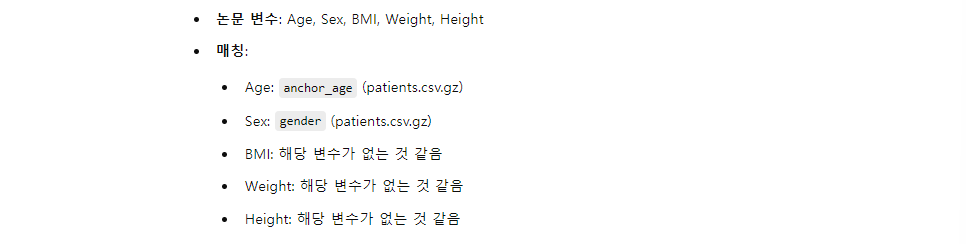

2. 실험실 검사

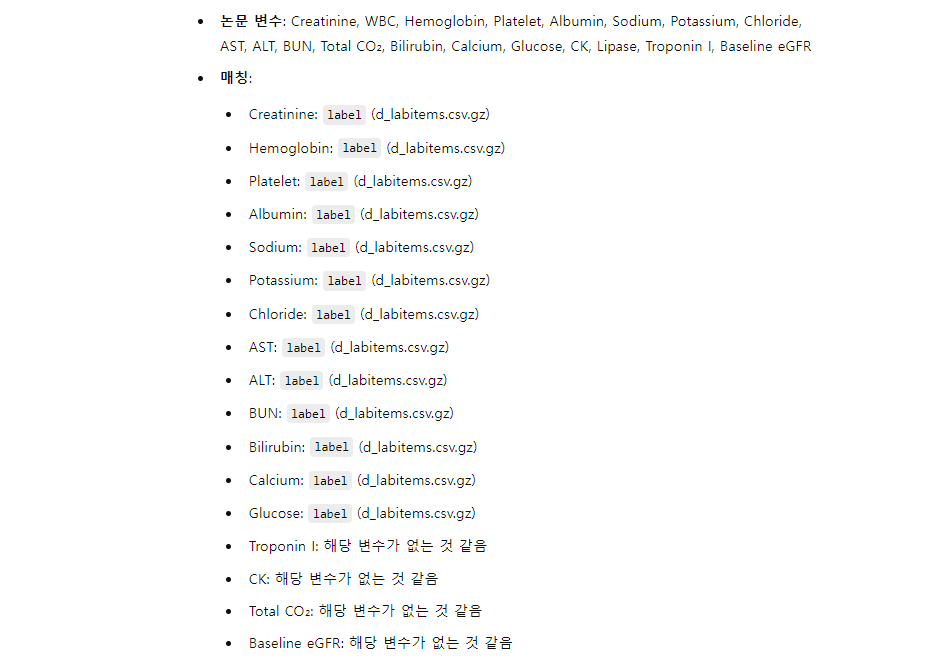

3. 바이탈 사인



2. `chartevents.csv.gz`
- **설명**: 환자의 바이탈 사인, 검사 결과, 약물 투여 등의 시계열 데이터를 포함하는 가장 큰 테이블입니다. 중환자실에서 주기적으로 측정된 환자의 상태 정보를 포함합니다.
- **주요 컬럼**:
  - `subject_id`: 환자 ID
  - `hadm_id`: 입원 ID
  - `stay_id`: 중환자실 체류 ID
  - `caregiver_id`: 의료진 ID
  - `charttime`: 데이터가 기록된 시간
  - `storetime`: 데이터가 저장된 시간
  - `itemid`: 항목의 고유 ID
  - `value`: 측정된 값
  - `valuenum`: 측정된 수치 값
  - `valueuom`: 단위
  - `warning`: 경고 플래그

---

3. `d_items.csv.gz`
- **설명**: `itemid`와 같은 데이터 항목의 메타데이터를 제공하는 테이블입니다. 각 항목의 이름과 설명이 포함되어 있어, `inputevents`, `outputevents` 등의 다른 테이블에서 사용된 `itemid`의 의미를 알 수 있습니다.
- **주요 컬럼**:
  - `itemid`: 항목의 고유 ID
  - `label`: 항목의 라벨 (예: "Heart Rate", "Blood Pressure")
  - `abbreviation`: 약어
  - `linksto`: 항목이 속하는 이벤트 테이블
  - `category`: 항목의 카테고리
  - `unitname`: 단위 (예: bpm, mmHg)
  - `param_type`: 데이터 유형 (예: Numeric, Text)
  - `lownormalvalue`: 정상 하한 값
  - `highnormalvalue`: 정상 상한 값

---

4. `datetimeevents.csv.gz`
- **설명**: 중환자실 내에서 시간 관련 이벤트를 기록한 데이터입니다. 환자의 검사 결과, 바이탈 사인 측정 등과 관련된 시간 이벤트가 포함될 수 있습니다.
- **주요 컬럼**:
  - `subject_id`: 환자 ID
  - `hadm_id`: 입원 ID
  - `stay_id`: 중환자실 체류 ID
  - `caregiver_id`: 의료진 ID
  - `charttime`: 이벤트가 기록된 시간
  - `storetime`: 이벤트가 데이터베이스에 저장된 시간
  - `itemid`: 시간 이벤트 항목의 고유 ID
  - `value`: 시간 값
  - `valueuom`: 단위
  - `warning`: 경고 플래그

4. 동반질환

- 이는 주 진단, 부 진단 변수를 사용하면 될 듯

5. 약물 사용


### 8. `emar.csv.gz`
- **설명**: 전자 투약 관리(Electronic Medication Administration Record, EMAR) 시스템을 통해 기록된 투약 이벤트 정보를 포함하는 테이블입니다.
- **주요 컬럼**:
  - `subject_id`: 환자 ID
  - `hadm_id`: 입원 ID
  - `emar_id`: EMAR 이벤트 ID
  - `emar_seq`: EMAR 이벤트 순서 번호
  - `poe_id`: 처방 이벤트 ID
  - `pharmacy_id`: 약국 ID
  - `charttime`: 투약 기록 시간
  - `medication`: 투약된 약물 이름
  - `event_txt`: 투약 이벤트 텍스트 (예: "Administered", "Flushed")
  - `scheduletime`: 예정된 투약 시간
  - `storetime`: 투약 기록이 저장된 시간

### 9. `emar_detail.csv.gz`
- **설명**: `emar.csv.gz`에 있는 투약 이벤트의 상세 정보를 제공하는 테이블입니다.
- **주요 컬럼**:
  - `subject_id`: 환자 ID
  - `emar_id`: EMAR 이벤트 ID
  - `emar_seq`: EMAR 이벤트 순서 번호
  - `parent_field_ordinal`: 상위 필드 순서 번호
  - `administration_type`: 투약 유형
  - `pharmacy_id`: 약국 ID
  - `dose_due`: 예정된 투약량
  - `dose_due_unit`: 예정된 투약량 단위
  - `dose_given`: 실제 투약량
  - `dose_given_unit`: 실제 투약량 단위

6. 임상 상태

In [ ]:
import pandas as pd
import os

In [ ]:
import pandas as pd
import os

# 기본 경로 설정
data_dir = '/content/drive/MyDrive/AKI/mimic/3.0'
icu_dir = f"{data_dir}/icu"

# 확인할 변수 목록
demographics_vars = ['Age', 'Sex', 'BMI', 'Weight', 'Height']
lab_tests_vars = ['Creatinine', 'WBC', 'Hemoglobin', 'Platelet', 'Albumin', 'Sodium', 'Potassium', 'Chloride',
                  'AST', 'ALT', 'BUN', 'Total CO₂', 'Bilirubin', 'Calcium', 'Glucose', 'CK', 'Lipase',
                  'Troponin I', 'Baseline eGFR']
vitals_vars = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Pulse Rate', 'Mean Arterial Pressure',
               'Body Temperature']
comorbidities_vars = ['Ischemic Heart Disease', 'Hypertension', 'Diabetes Mellitus', 'Heart Failure',
                      'Liver Disease', 'Cerebrovascular Disease', 'Chronic Obstructive Pulmonary Disease',
                      'Chronic Kidney Disease', 'Previous AKI', 'Cancer', 'HIV']
medications_vars = ['NSAIDs', 'Diuretics', 'Acyclovir', 'Aminoglycoside', 'Amphotericin', 'Beta Blocker',
                    'Calcium Channel Blocker', 'Cisplatin', 'Vancomycin', 'Colistin', 'Cyclosporin',
                    'Renin-Angiotensin Blocker', 'Vasopressors', 'Statins']
clinical_conditions_vars = ['Departments', 'Mechanical Ventilation', 'ICU Admission', 'Surgery',
                            'Anesthesia', 'Surgery Duration']

# 데이터셋 파일 이름 (ICU 폴더에 있는 파일들)
icu_files = [
    'caregiver.csv.gz', 'chartevents.csv.gz', 'd_items.csv.gz', 'datetimeevents.csv.gz',
    'icustays.csv.gz', 'ingredientevents.csv.gz', 'inputevents.csv.gz', 'outputevents.csv.gz',
    'procedureevents.csv.gz'
]

# 각 파일에서 변수 확인
def check_variables_in_files(vars_list, files):
    found_vars = {var: False for var in vars_list}
    for file in files:
        file_path = os.path.join(icu_dir, file)
        try:
            # 필요한 컬럼만 읽기
            df = pd.read_csv(file_path, usecols=lambda column: column in vars_list)
            for var in vars_list:
                if var in df.columns:
                    found_vars[var] = True
        except Exception as e:
            print(f"Error reading {file}: {e}")
    return found_vars

# 각 카테고리의 변수 확인
demographics_found = check_variables_in_files(demographics_vars, icu_files)
lab_tests_found = check_variables_in_files(lab_tests_vars, icu_files)
vitals_found = check_variables_in_files(vitals_vars, icu_files)
comorbidities_found = check_variables_in_files(comorbidities_vars, icu_files)
medications_found = check_variables_in_files(medications_vars, icu_files)
clinical_conditions_found = check_variables_in_files(clinical_conditions_vars, icu_files)

# 결과 출력
print("Demographics Variables Found:", demographics_found)
print("Laboratory Tests Variables Found:", lab_tests_found)
print("Vitals Variables Found:", vitals_found)
print("Comorbidities Variables Found:", comorbidities_found)
print("Medications Variables Found:", medications_found)
print("Clinical Conditions Variables Found:", clinical_conditions_found)


Error reading chartevents.csv.gz: [Errno 2] No such file or directory: '/content/drive/MyDrive/AKI/mimic/3.0/hosp/chartevents.csv.gz'
Error reading icustays.csv.gz: [Errno 2] No such file or directory: '/content/drive/MyDrive/AKI/mimic/3.0/hosp/icustays.csv.gz'
Error reading chartevents.csv.gz: [Errno 2] No such file or directory: '/content/drive/MyDrive/AKI/mimic/3.0/hosp/chartevents.csv.gz'
Error reading icustays.csv.gz: [Errno 2] No such file or directory: '/content/drive/MyDrive/AKI/mimic/3.0/hosp/icustays.csv.gz'
Error reading chartevents.csv.gz: [Errno 2] No such file or directory: '/content/drive/MyDrive/AKI/mimic/3.0/hosp/chartevents.csv.gz'
Error reading icustays.csv.gz: [Errno 2] No such file or directory: '/content/drive/MyDrive/AKI/mimic/3.0/hosp/icustays.csv.gz'
Error reading chartevents.csv.gz: [Errno 2] No such file or directory: '/content/drive/MyDrive/AKI/mimic/3.0/hosp/chartevents.csv.gz'
Error reading icustays.csv.gz: [Errno 2] No such file or directory: '/content/dr

In [ ]:
#  Demographics (인구통계학적 정보)

import pandas as pd

# 청크 사이즈 설정
chunk_size = 10000

# 필요한 변수 정의
demographics_columns = ['subject_id', 'gender', 'anchor_age']
admissions_columns = ['subject_id', 'hadm_id', 'admittime', 'dischtime']

# patients.csv.gz 데이터 불러오기
patients_chunks = pd.read_csv(f"{hosp_dir}/patients.csv.gz", usecols=demographics_columns, chunksize=chunk_size, compression='gzip')
patients_df = pd.concat(patients_chunks)

# admissions.csv.gz 데이터 불러오기
admissions_chunks = pd.read_csv(f"{hosp_dir}/admissions.csv.gz", usecols=admissions_columns, chunksize=chunk_size, compression='gzip')
admissions_df = pd.concat(admissions_chunks)

# 데이터 병합 (age, gender, admission 정보를 병합하여 입원 당시의 인구통계 정보 생성)
demographics_df = pd.merge(patients_df, admissions_df, on='subject_id', how='inner')

# BMI, Weight, Height 계산 (BMI = Weight / (Height/100)^2) -> 추후 업데이트 필요
# 데이터 확인
print("Demographics DataFrame")
print(demographics_df.head())


Demographics DataFrame
   subject_id gender  anchor_age   hadm_id            admittime  \
0    10000032      F          52  22595853  2180-05-06 22:23:00   
1    10000032      F          52  22841357  2180-06-26 18:27:00   
2    10000032      F          52  25742920  2180-08-05 23:44:00   
3    10000032      F          52  29079034  2180-07-23 12:35:00   
4    10000068      F          19  25022803  2160-03-03 23:16:00   

             dischtime  
0  2180-05-07 17:15:00  
1  2180-06-27 18:49:00  
2  2180-08-07 17:50:00  
3  2180-07-25 17:55:00  
4  2160-03-04 06:26:00  


In [ ]:
# # pandas 출력 옵션 설정
# pd.set_option('display.max_rows', None)  # 모든 행 출력
# pd.set_option('display.max_columns', None)  # 모든 열 출력

In [ ]:
# # patients.csv.gz 데이터 불러오기
# patients_chunks = pd.read_csv(f"{hosp_dir}/patients.csv.gz", chunksize=10000, compression='gzip')
# patients_df = pd.concat(patients_chunks)

# # admissions.csv.gz 데이터 불러오기
# admissions_chunks = pd.read_csv(f"{hosp_dir}/admissions.csv.gz", chunksize=10000, compression='gzip')
# admissions_df = pd.concat(admissions_chunks)

# for chunk in patients_chunks:
#     print(chunk.head())

# for chunk in admissions_chunks:
#     print(chunk.head())

In [ ]:
# # d_labitems.csv.gz 데이터 로드하여 itemid와 label 확인
# labitems_chunks = pd.read_csv(f"{hosp_dir}/d_labitems.csv.gz", chunksize=10000, compression='gzip')

# # 모든 항목 출력
# for chunk in labitems_chunks:
#     print(chunk[['itemid', 'label']])

      itemid                                       label
0      50801                  Alveolar-arterial Gradient
1      50802                                 Base Excess
2      50803         Calculated Bicarbonate, Whole Blood
3      50804                        Calculated Total CO2
4      50805                           Carboxyhemoglobin
5      50806                       Chloride, Whole Blood
6      50808                                Free Calcium
7      50809                                     Glucose
8      50810                      Hematocrit, Calculated
9      50811                                  Hemoglobin
10     50812                                   Intubated
11     50813                                     Lactate
12     50814                               Methemoglobin
13     50815                                     O2 Flow
14     50816                                      Oxygen
15     50817                           Oxygen Saturation
16     50818                   

In [ ]:
# # d_items.csv.gz 데이터 로드하여 itemid와 label 확인
# items_chunks = pd.read_csv(f"{data_dir}/icu/d_items.csv.gz", chunksize=10000, compression='gzip')

# # 모든 항목 출력
# for chunk in items_chunks:
#     print(chunk[['itemid', 'label']])


      itemid                                              label
0     220001                                       Problem List
1     220003                                 ICU Admission date
2     220045                                         Heart Rate
3     220046                            Heart rate Alarm - High
4     220047                             Heart Rate Alarm - Low
5     220048                                       Heart Rhythm
6     220050                   Arterial Blood Pressure systolic
7     220051                  Arterial Blood Pressure diastolic
8     220052                       Arterial Blood Pressure mean
9     220056                Arterial Blood Pressure Alarm - Low
10    220058               Arterial Blood Pressure Alarm - High
11    220059                 Pulmonary Artery Pressure systolic
12    220060                Pulmonary Artery Pressure diastolic
13    220061                     Pulmonary Artery Pressure mean
14    220063             Pulmonary Arter

In [ ]:
# # diagnoses_icd.csv.gz 데이터 로드하여 icd_code 확인
# diagnoses_chunks = pd.read_csv(f"{hosp_dir}/diagnoses_icd.csv.gz", chunksize=10000, compression='gzip')

# # icd_code 출력
# for chunk in diagnoses_chunks:
#     print(chunk[['icd_code']].drop_duplicates())



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6344364    V5883
6344366     V142
6344370    29632
6344372      340
6344385     F840
6344389      F79
6344392   G40909
6344393     R680
6344396     R748
6344401    R8271
6344418    R6250
6344426    L4050
6344440    M4807
6344445     6202
6344447     6149
6344453     6140
6344454     6171
6344456    27650
6344457    78909
6344459     2979
6344463    71941
6344465    30120
6344467    78322
6344474     9592
6344476     I614
6344478    J9621
6344481     G935
6344485     E859
6344500     E878
6344505     I878
6344519  T8111XA
6344520  T8112XA
6344527  T8144XA
6344530    A0472
6344533    I5030
6344535    I5082
6344545    E1151
6344546     K056
6344549    I6522
6344553   I70209
6344568    I6523
6344575    D3911
6344577     R578
6344581   N83511
6344583    N7092
6344586    82002
6344589    29041
6344590    70710
6344605    45341
6344608    70712
6344613    27739
6344614    58181
6344617      920
6344630     G131
6344642   M48062
6344643    M4317
6344644    M

In [ ]:
# # emar.csv.gz 데이터 로드하여 medication 확인
# emar_chunks = pd.read_csv(f"{hosp_dir}/emar.csv.gz", chunksize=10000, compression='gzip')

# # medication 출력
# for chunk in emar_chunks:
#     print(chunk[['medication']].drop_duplicates())


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
40104308                                      Ascorbic Acid
40104353                               Ampicillin-Sulbactam
40104392                            Piperacillin-Tazobactam
40104475          Isosorbide Mononitrate (Extended Release)
40104479                                     Spironolactone
40104483                                          Lidocaine
40104557                                         Ranitidine
40104565                                          Milrinone
40104796                                         Colchicine
40104922                                          Captopril
40104964                    Hepatitis B Vaccine (20 mcg/mL)
40104990                                   Ferric Gluconate
40105174                                         Ivermectin
40105186                                       Phytonadione
40105190                       Measles, Mumps & Rubella Vac
40105231                                        Vasopressin
4010

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
#  Laboratory Tests (실험실 검사)

# d_labitems.csv.gz 데이터 로드하여 itemid와 label 매핑
labitems_columns = ['itemid', 'label', 'category']
labitems_df = pd.read_csv(f"{hosp_dir}/d_labitems.csv.gz", usecols=labitems_columns, compression='gzip')

# labevents.csv.gz에서 필요한 itemid 추출 (논문에 나온 실험실 검사 항목과 일치하는 itemid)
# 여기서는 특정 항목이 필요할 경우 필터링
required_lab_tests = [
    'creatinine', 'WBC', 'hemoglobin', 'platelet', 'albumin', 'sodium',
    'potassium', 'chloride', 'AST', 'ALT', 'BUN', 'total CO2',
    'bilirubin', 'calcium', 'glucose', 'CK', 'lipase', 'troponin I'
]

# 필요한 항목 필터링
required_labitems_df = labitems_df[labitems_df['label'].isin(required_lab_tests)]
required_labitem_ids = required_labitems_df['itemid'].tolist()

# labevents.csv.gz 데이터에서 필요한 실험실 검사 항목 필터링
lab_columns = ['subject_id', 'hadm_id', 'itemid', 'charttime', 'valuenum']
labevents_chunks = pd.read_csv(f"{hosp_dir}/labevents.csv.gz", usecols=lab_columns, chunksize=10000, compression='gzip')

# 필터링된 실험실 검사 데이터를 리스트에 저장
filtered_labevents_list = []
for chunk in labevents_chunks:
    filtered_chunk = chunk[chunk['itemid'].isin(required_labitem_ids)]
    filtered_labevents_list.append(filtered_chunk)

# 필터링된 실험실 검사 데이터프레임 생성
filtered_labevents_df = pd.concat(filtered_labevents_list)

# 데이터 확인
print("Filtered Lab Events DataFrame")
print(filtered_labevents_df.head())


KeyboardInterrupt: 

# 2. AKI와 기준 크레아티닌 정의

AKI 정의 (AKI Definition):
- AKI(급성 신손상)는 Kidney Disease: Improving Global Outcomes (KDIGO) Clinical Practice Guideline에 따라 정의되었습니다.
- 정의 기준:
  - 소변량 데이터가 사용되지 않았기 때문에, 혈청 크레아티닌(Serum Creatinine, Cr) 수치만을 사용하여 AKI 단계를 정의했습니다.
  - AKI는 다음과 같은 기준을 충족할 때 진단됩니다:
    - 48시간 이내에 Cr 값이 0.3 mg/dL 이상 증가.
    - 7일 이내에 기존 Cr 값의 1.5배 이상 증가.
- 기준 크레아티닌 값 설정 (Baseline Creatinine Definition):
  - 기준 Cr 값은 입원 전 2주 내에 측정된 최소 Cr 값으로 설정됩니다.
  - 설정 기준:
    - 입원 전 2주 동안 Cr 값이 없는 경우, 입원 전 90일 이내에 측정된 최소 Cr 값이 기준값으로 설정됩니다.
    - 입원 전 90일 내에도 Cr 값이 없는 경우, 180일 이내에 측정된 최소 Cr 값을 기준으로 합니다.
    - 만약 입원 전 180일 동안 Cr 값이 없다면, 입원 첫날의 Cr 값을 기준으로 설정합니다.
  - 이러한 기준을 통해 각 환자의 입원 전 신기능 상태를 평가하고, AKI 발생을 정의하기 위한 기본 지표로 활용하였습니다.

In [ ]:
# 'charttime' 컬럼의 최소 날짜와 최대 날짜 확인
min_date = creatinine_data['charttime'].min()
max_date = creatinine_data['charttime'].max()

print(f"최소 날짜: {min_date}")
print(f"최대 날짜: {max_date}")


최소 날짜: 2105-10-04 17:27:00
최대 날짜: 2215-01-12 11:45:00


In [ ]:
import pandas as pd

# 혈청 크레아티닌 데이터 불러오기 함수
def load_creatinine_data(chunksize=10000):
    creatinine_chunks = []
    for chunk in pd.read_csv(f"{hosp_dir}/labevents.csv.gz", chunksize=chunksize):
        # 혈청 크레아티닌 데이터만 선택
        creatinine_data = chunk[chunk['itemid'] == 50912]
        creatinine_chunks.append(creatinine_data)
    return pd.concat(creatinine_chunks, ignore_index=True)

# 입원 정보 불러오기
admissions = pd.read_csv(f"{hosp_dir}/admissions.csv.gz")

# 크레아티닌 데이터 로드
creatinine_data = load_creatinine_data()

# 'valuenum' 컬럼을 숫자형으로 확인 (이미 숫자형일 가능성이 높음)
print(creatinine_data['valuenum'].dtype)  # float64가 출력되어야 함
print(creatinine_data[['value', 'valuenum']].head())

float64
  value  valuenum
0   0.4       0.4
1   0.3       0.3
2   0.3       0.3
3   0.4       0.4
4   0.4       0.4


In [ ]:
creatinine_data.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,admittime,dischtime,year
0,150,10000032,22595853,86271148,50912,NaN,2180-05-07 05:05:00,2180-05-07 07:03:00,0.3,0.3,mg/dL,0.4,1.1,abnormal,ROUTINE,NaN,2180-05-06 22:23:00,2180-05-07 17:15:00,2180
1,338,10000032,22841357,88261647,50912,NaN,2180-06-27 05:10:00,2180-06-27 07:26:00,0.3,0.3,mg/dL,0.4,1.1,abnormal,ROUTINE,NaN,2180-06-26 18:27:00,2180-06-27 18:49:00,2180
2,399,10000032,29079034,55621508,50912,NaN,2180-07-23 21:45:00,2180-07-23 22:30:00,0.5,0.5,mg/dL,0.4,1.1,NaN,STAT,NaN,2180-07-23 12:35:00,2180-07-25 17:55:00,2180
3,415,10000032,29079034,20101859,50912,NaN,2180-07-24 06:35:00,2180-07-24 08:11:00,0.4,0.4,mg/dL,0.4,1.1,NaN,STAT,NaN,2180-07-23 12:35:00,2180-07-25 17:55:00,2180
4,447,10000032,29079034,66433308,50912,NaN,2180-07-25 04:45:00,2180-07-25 07:44:00,0.4,0.4,mg/dL,0.4,1.1,NaN,ROUTINE,NaN,2180-07-23 12:35:00,2180-07-25 17:55:00,2180


In [ ]:
# hadm_id 결측치 확인 및 제거
missing_hadm = creatinine_data['hadm_id'].isna().sum()
total_rows = creatinine_data.shape[0]
print(f"전체 행 수: {total_rows}, hadm_id 결측치 수: {missing_hadm}")

전체 행 수: 4319091, hadm_id 결측치 수: 1732045


In [ ]:
# hadm_id가 NaN인 행 제거
creatinine_data = creatinine_data.dropna(subset=['hadm_id'])
print(f"hadm_id 결측치 제거 후 행 수: {creatinine_data.shape[0]}")

hadm_id 결측치 제거 후 행 수: 2587046


In [ ]:
# 'subject_id'와 'hadm_id'의 데이터 타입 확인
print("\nCreatinine 데이터프레임의 'subject_id'와 'hadm_id' 데이터 타입:")
print(creatinine_data[['subject_id', 'hadm_id']].dtypes)

print("\nAdmissions 데이터프레임의 'subject_id'와 'hadm_id' 데이터 타입:")
print(admissions[['subject_id', 'hadm_id']].dtypes)


Creatinine 데이터프레임의 'subject_id'와 'hadm_id' 데이터 타입:
subject_id      int64
hadm_id       float64
dtype: object

Admissions 데이터프레임의 'subject_id'와 'hadm_id' 데이터 타입:
subject_id    int64
hadm_id       int64
dtype: object


In [ ]:
# `hadm_id`의 소수점 확인
fractional_hadm = creatinine_data['hadm_id'] % 1
if (fractional_hadm != 0).any():
    print("주의: `hadm_id`에 소수점이 포함된 값이 존재합니다.")
    print(creatinine_data.loc[fractional_hadm != 0, 'hadm_id'].unique())
else:
    print("모든 `hadm_id` 값이 정수형입니다.")

모든 `hadm_id` 값이 정수형입니다.


In [ ]:
# `hadm_id`가 정수형인 경우 변환
if (fractional_hadm != 0).any():
    # 소수점이 있는 `hadm_id`를 처리하는 방법 결정
    # 예를 들어, 소수점 이하를 버리거나, 필요한 경우 다른 방식으로 처리
    # 여기서는 소수점 이하를 버리고 변환
    creatinine_data = creatinine_data[creatinine_data['hadm_id'] % 1 == 0]
    creatinine_data['hadm_id'] = creatinine_data['hadm_id'].astype(int)
    print("소수점이 있는 `hadm_id`를 제거하고 `int`로 변환했습니다.")
else:
    # 소수점이 없으므로 바로 `int`로 변환
    creatinine_data['hadm_id'] = creatinine_data['hadm_id'].astype(int)
    print("`hadm_id`를 `int`로 변환했습니다.")

`hadm_id`를 `int`로 변환했습니다.


In [ ]:
# 확인 후 변환
if creatinine_data['subject_id'].dtype != admissions['subject_id'].dtype:
    creatinine_data['subject_id'] = creatinine_data['subject_id'].astype(int)
    admissions['subject_id'] = admissions['subject_id'].astype(int)

if creatinine_data['hadm_id'].dtype != admissions['hadm_id'].dtype:
    creatinine_data['hadm_id'] = creatinine_data['hadm_id'].astype(int)
    admissions['hadm_id'] = admissions['hadm_id'].astype(int)

In [ ]:
# 병합
creatinine_data = creatinine_data.merge(
    admissions[['subject_id', 'hadm_id', 'admittime', 'dischtime']],
    on=['subject_id', 'hadm_id'],
    how='left'
)

# 병합 후 'admittime' 열 존재 여부 확인
if 'admittime' in creatinine_data.columns:
    print("\n'admittime' 열이 creatinine_data 데이터프레임에 존재합니다.")
else:
    print("\n'admittime' 열이 creatinine_data 데이터프레임에 존재하지 않습니다.")


'admittime' 열이 creatinine_data 데이터프레임에 존재합니다.


In [ ]:
# 'admittime'과 'charttime'을 datetime 형식으로 변환
creatinine_data['admittime'] = pd.to_datetime(creatinine_data['admittime'], errors='coerce')
creatinine_data['charttime'] = pd.to_datetime(creatinine_data['charttime'], errors='coerce')

# 병합 후 데이터프레임의 열 확인
print("\n병합 후 creatinine_data 데이터프레임의 열:")
print(creatinine_data.columns)

# 병합 후 일부 샘플 확인
print("\n병합 후 creatinine_data 데이터프레임의 일부 샘플:")
print(creatinine_data[['subject_id', 'hadm_id', 'admittime', 'charttime', 'valuenum']].head())


병합 후 creatinine_data 데이터프레임의 열:
Index(['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid',
       'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments', 'admittime', 'dischtime'],
      dtype='object')

병합 후 creatinine_data 데이터프레임의 일부 샘플:
   subject_id   hadm_id           admittime           charttime  valuenum
0    10000032  22595853 2180-05-06 22:23:00 2180-05-07 05:05:00       0.3
1    10000032  22841357 2180-06-26 18:27:00 2180-06-27 05:10:00       0.3
2    10000032  29079034 2180-07-23 12:35:00 2180-07-23 21:45:00       0.5
3    10000032  29079034 2180-07-23 12:35:00 2180-07-24 06:35:00       0.4
4    10000032  29079034 2180-07-23 12:35:00 2180-07-25 04:45:00       0.4


In [ ]:
# 'admittime' 결측치 확인
missing_admittime = creatinine_data['admittime'].isna().sum()
print(f"\n'admittime' 결측치 수: {missing_admittime}")


'admittime' 결측치 수: 16


In [ ]:
# 'admittime'이 NaT인 행의 예시 출력
print(creatinine_data[missing_admittime][['subject_id', 'hadm_id', 'admittime', 'charttime', 'valuenum']].head(16))

         subject_id   hadm_id admittime           charttime  valuenum
1828258    17080681  25029676       NaT 2138-10-29 10:58:00       0.9
1828259    17080681  25029676       NaT 2138-10-30 09:25:00       0.6
1828260    17080681  25029676       NaT 2138-10-31 05:56:00       0.5
1828261    17080681  25029676       NaT 2138-11-01 05:55:00       0.5
1828262    17080681  25029676       NaT 2138-11-02 06:12:00       0.4
1828263    17080681  25029676       NaT 2138-11-03 06:42:00       0.4
1828264    17080681  25029676       NaT 2138-11-04 06:30:00       0.4
1828265    17080681  25029676       NaT 2138-11-05 07:09:00       0.4
1828266    17080681  25029676       NaT 2138-11-06 08:33:00       0.4
1828267    17080681  25029676       NaT 2138-11-07 06:05:00       0.5
1828268    17080681  25029676       NaT 2138-11-08 06:30:00       0.5
1828269    17080681  25029676       NaT 2138-11-09 06:11:00       0.5
1828270    17080681  25029676       NaT 2138-11-10 06:28:00       0.5
1828271    17080681 

In [ ]:
# 'admittime'이 NaT인 행 제거
creatinine_data = creatinine_data.dropna(subset=['admittime'])
print(f"'admittime' 결측치 제거 후 행 수: {creatinine_data.shape[0]}")

'admittime' 결측치 제거 후 행 수: 2587030


In [ ]:
# 기준 크레아티닌 값 계산 함수
def get_baseline_creatinine(group):
    admittime = group['admittime'].iloc[0]

    # 입원 전 2주 (14일) 내 측정된 Cr 값
    mask_2week = group['charttime'] < admittime
    creatinine_2week = group.loc[mask_2week, 'valuenum']
    if not creatinine_2week.empty:
        return creatinine_2week.min()

    # 입원 전 90일 (3개월) 내 측정된 Cr 값 (2주 내 측정값 없을 경우)
    mask_90day = (group['charttime'] >= admittime - timedelta(days=90)) & (group['charttime'] < admittime - timedelta(days=14))
    creatinine_90day = group.loc[mask_90day, 'valuenum']
    if not creatinine_90day.empty:
        return creatinine_90day.min()

    # 입원 전 180일 (6개월) 내 측정된 Cr 값 (90일 내 측정값 없을 경우)
    mask_180day = (group['charttime'] >= admittime - timedelta(days=180)) & (group['charttime'] < admittime - timedelta(days=90))
    creatinine_180day = group.loc[mask_180day, 'valuenum']
    if not creatinine_180day.empty:
        return creatinine_180day.min()

    # 입원 첫날 Cr 값 (180일 내 측정값 없을 경우)
    creatinine_admission = group.loc[group['charttime'] == admittime, 'valuenum']
    if not creatinine_admission.empty:
        return creatinine_admission.min()

    # 기준 값이 없을 경우 NaN 반환
    return pd.NA

In [ ]:
from datetime import timedelta

# 기준 크레아티닌 값 계산
baseline_creatinine = creatinine_data.groupby(['subject_id', 'hadm_id']).apply(get_baseline_creatinine).reset_index()
baseline_creatinine.columns = ['subject_id', 'hadm_id', 'baseline_creatinine']

# 기준 크레아티닌 값이 NaN인 경우 제거
baseline_creatinine = baseline_creatinine.dropna(subset=['baseline_creatinine'])
print(f"\n기준 크레아티닌 값이 설정된 그룹 수: {baseline_creatinine.shape[0]}")
print(baseline_creatinine.head())


기준 크레아티닌 값이 설정된 그룹 수: 63966
    subject_id   hadm_id baseline_creatinine
4     10000084  23052089                 0.8
5     10000084  29888819                 0.8
8     10000161  22148160                 0.9
9     10000248  20600184                 0.8
14    10000690  26504700                 0.9


In [ ]:
# AKI 판별 함수
def check_aki(creatinine_df, baseline_df):
    # 기준 크레아티닌 값 병합
    creatinine_df = creatinine_df.merge(baseline_df, on=['subject_id', 'hadm_id'], how='left')

    # AKI 조건 적용
    # 조건 1: 입원 후 48시간 이내 Cr 수치가 기준 Cr 값보다 0.3 mg/dL 이상 증가
    condition1 = (
        (creatinine_df['valuenum'] - creatinine_df['baseline_creatinine'] >= 0.3) &
        (creatinine_df['charttime'] <= (creatinine_df['admittime'] + pd.Timedelta(hours=48)))
    )

    # 조건 2: 입원 후 7일 이내 Cr 수치가 기준 Cr 값의 1.5배 이상 증가
    condition2 = (
        (creatinine_df['valuenum'] >= (creatinine_df['baseline_creatinine'] * 1.5)) &
        (creatinine_df['charttime'] <= (creatinine_df['admittime'] + pd.Timedelta(days=7)))
    )

    # AKI 결과 컬럼 초기화
    creatinine_df['aki'] = 0
    creatinine_df.loc[condition1 | condition2, 'aki'] = 1

    return creatinine_df

In [ ]:
# AKI 판별 수행
aki_results = check_aki(creatinine_data, baseline_creatinine)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)



AKI 판별 결과 샘플:
   subject_id   hadm_id           charttime  valuenum baseline_creatinine  aki
0    10000032  22595853 2180-05-07 05:05:00       0.3                 NaN    0
1    10000032  22841357 2180-06-27 05:10:00       0.3                 NaN    0
2    10000032  29079034 2180-07-23 21:45:00       0.5                 NaN    0
3    10000032  29079034 2180-07-24 06:35:00       0.4                 NaN    0
4    10000032  29079034 2180-07-25 04:45:00       0.4                 NaN    0

AKI 판별 결과 분포:
aki
0    2575417
1      11613
Name: count, dtype: int64

AKI 판별된 샘플 (최대 10개):
      subject_id   hadm_id           charttime  valuenum baseline_creatinine  \
2474    10010888  20162667 2174-01-08 21:30:00       2.5                 2.0   
2920    10011938  29778485 2134-03-01 06:21:00       2.3                 1.9   
2922    10011938  29778485 2134-03-02 00:13:00       2.3                 1.9   
2923    10011938  29778485 2134-03-02 05:50:00       2.3                 1.9   
2924    10011938  

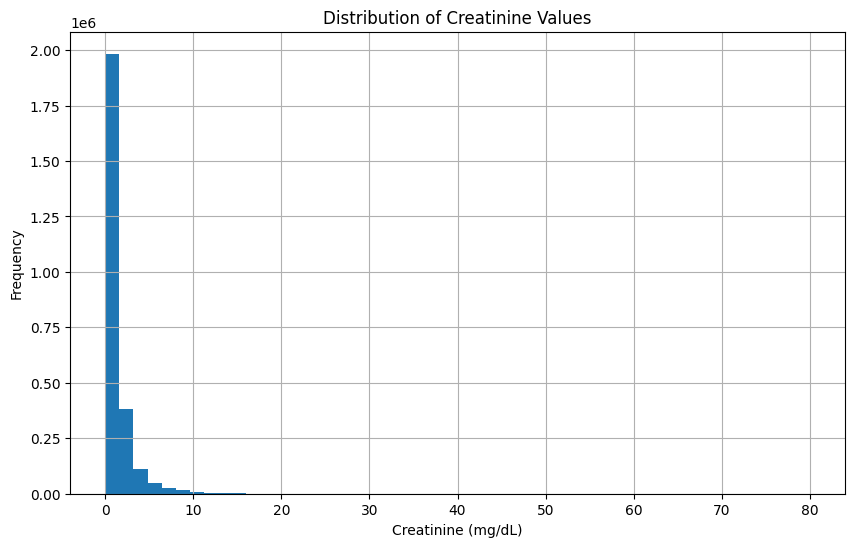

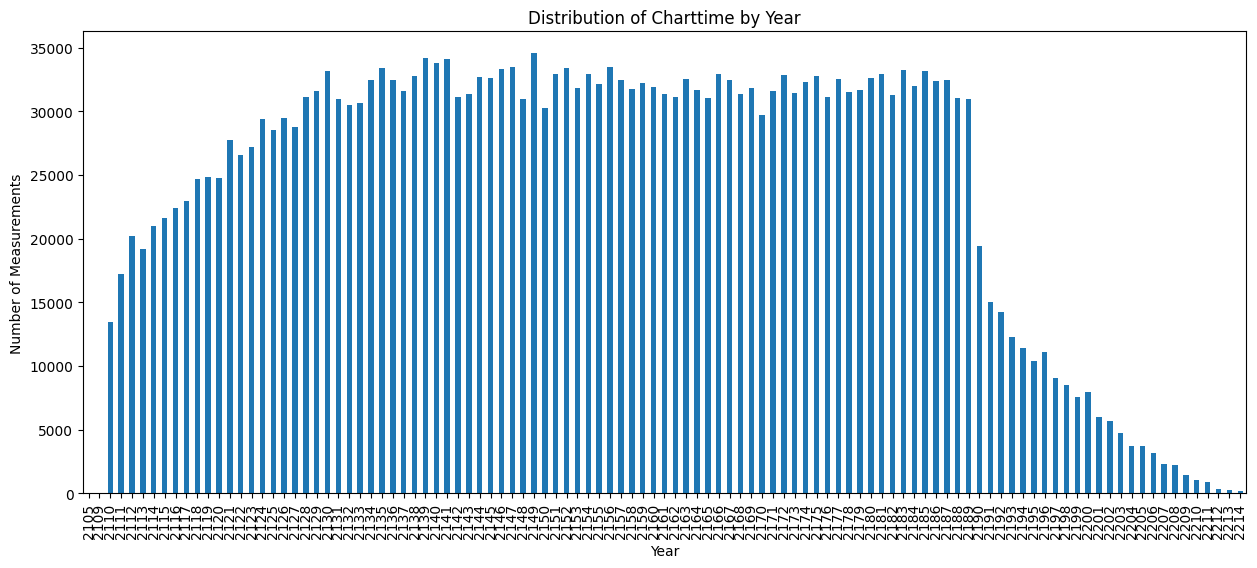

In [ ]:
import matplotlib.pyplot as plt

# AKI 판별 결과 확인
print("\nAKI 판별 결과 샘플:")
print(aki_results[['subject_id', 'hadm_id', 'charttime', 'valuenum', 'baseline_creatinine', 'aki']].head())

print("\nAKI 판별 결과 분포:")
print(aki_results['aki'].value_counts())

# AKI 판별된 샘플 확인 (최대 10개)
sample_aki = aki_results[aki_results['aki'] == 1]
print("\nAKI 판별된 샘플 (최대 10개):")
print(sample_aki[['subject_id', 'hadm_id', 'charttime', 'valuenum', 'baseline_creatinine', 'aki']].head(10))

# 기준 크레아티닌 값의 통계량 확인
print("\n기준 크레아티닌 값의 통계량:")
print(baseline_creatinine['baseline_creatinine'].describe())

# 'valuenum'의 분포 확인
plt.figure(figsize=(10,6))
creatinine_data['valuenum'].hist(bins=50)
plt.xlabel('Creatinine (mg/dL)')
plt.ylabel('Frequency')
plt.title('Distribution of Creatinine Values')
plt.show()

# AKI 판별 결과의 연도별 분포 확인 (선택 사항)
creatinine_data['year'] = creatinine_data['charttime'].dt.year
year_counts = creatinine_data['year'].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Number of Measurements')
plt.title('Distribution of Charttime by Year')
plt.show()

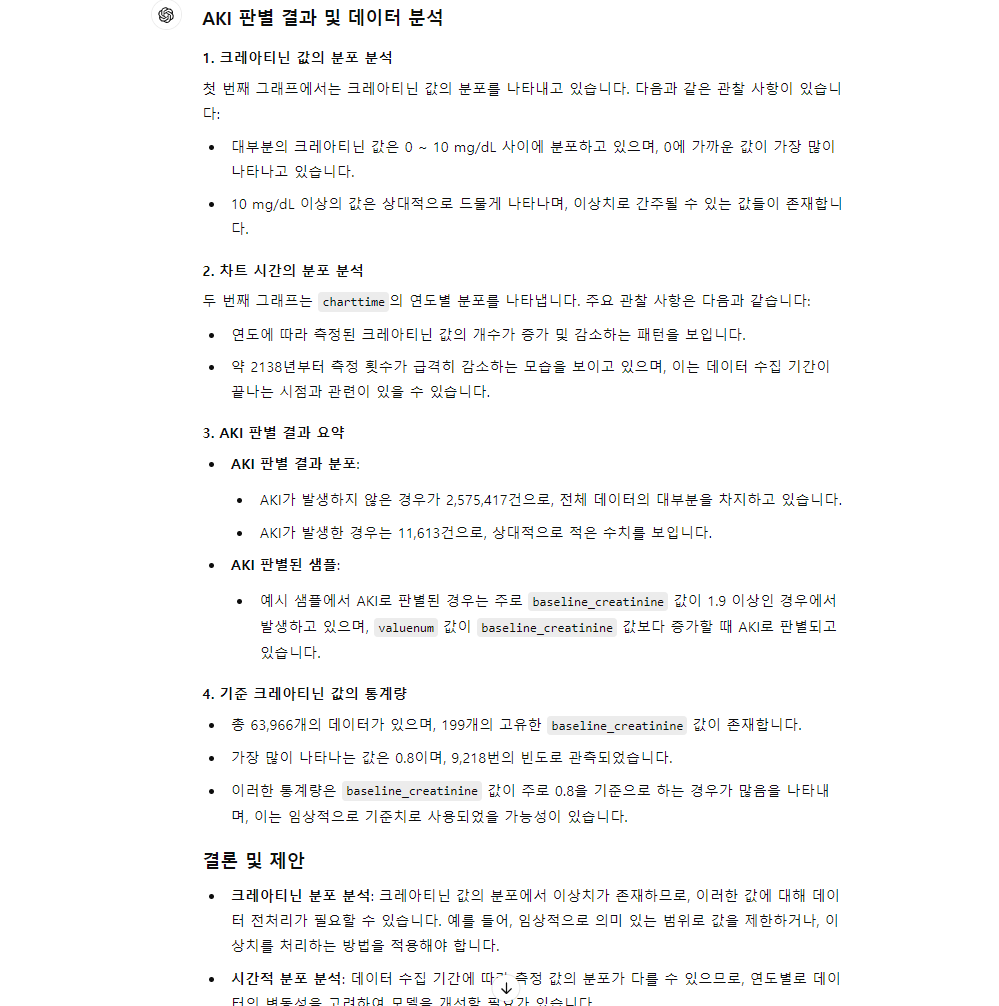

In [ ]:
# CSV 파일로 저장 (인덱스 제외)
aki_results.to_csv('aki_results.csv', index=False)

# CSV 파일을 압축하여 저장 (gzip 사용)
aki_results.to_csv('aki_results.csv.gz', index=False, compression='gzip')

# 3. 데이터 전처리

- 오류 값 처리 (Handling Error Values):
  - 데이터 수집 과정에서 발견된 오류 값은 결측값으로 처리되었습니다.
  - 오류 값은 비정상적으로 높은 값이나, 측정 오류로 의심되는 값 등을 포함합니다.
- 이상치 제거 (Outlier Removal):
  - 모든 변수의 이상치는 도메인 전문가의 검토를 통해 제거되었습니다.
  - 예를 들어, 비정상적으로 높은 실험실 검사 수치나, 일반적인 생리적 범위를 벗어나는 바이탈 사인 값 등이 제거 대상이 됩니다.
- 결측치 처리 (Handling Missing Values):
  - 기준 시점에서 중요한 변수들이 결측된 환자는 분석에서 제외되었습니다.
  - 기준값 이후 발생한 결측치는 '마지막 관찰값 유지(Last Observation Carried Forward, LOCF)' 방법을 사용하여 처리하였습니다.
  - 예를 들어, 입원 첫날 Cr 값이 결측인 경우, 입원 첫날의 관찰값을 그대로 유지하여 이후 분석에 활용합니다.

# 4. 데이터 정규화

- 연속형 변수의 정규화 (Normalization of Continuous Variables):
  - 신경망 모델 학습 전에 모든 연속형 변수는 min-max 정규화를 사용하여 [0, 1] 범위로 스케일링되었습니다.
  - 예를 들어, Cr 값이 0.5에서 5.0 사이의 범위를 가진다면, 이 값을 0에서 1로 변환하여 모델의 입력으로 사용합니다.

# 5. 슬라이딩 윈도우 생성 및 학습 데이터 구성

- 슬라이딩 윈도우 생성 (Sliding Window Creation):
  - 연속적인 시계열 데이터를 처리하기 위해 슬라이딩 윈도우 기법을 사용하였습니다.
  - 윈도우의 길이는 7일로 설정되었습니다. 즉, 각 윈도우는 환자의 입원 기간 동안 7일간의 관찰 데이터를 포함합니다.
  - 슬라이딩 윈도우는 하루 단위로 이동하며, 각 윈도우마다 모델에 입력될 새로운 데이터셋이 생성됩니다.
- 학습 데이터셋 구성 (Training Dataset Construction):
  - 각 슬라이딩 윈도우는 환자의 동적 변수(예: 실험실 검사, 바이탈 사인)와 정적 변수(예: 나이, 성별, 동반질환)를 포함하는 학습 데이터를 구성합니다.
  - 목표 변수는 다음 7일 내의 AKI 발생 여부와 다음 3일 동안의 Cr 값입니다.

# 6. 데이터셋 분할

- 훈련 및 검증 데이터셋 분할 (Training and Validation Split):
  - SNUBH 데이터셋은 훈련셋과 검증셋으로 나뉘어 학습에 사용되었습니다.
  - 분할 비율:
    - 전체 데이터의 90%는 훈련 데이터셋(69,081개)으로, 10%는 검증 데이터셋(7,675개)으로 나뉘었습니다.
    - 데이터셋 분할은 stratified random split을 사용하여 클래스 비율이 훈련셋과 검증셋에 균등하게 분포되도록 하였습니다.